In [1]:
import os
import utils.cop as cop
from utils.data_loader import load_data, load_file, convert_signal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

In [2]:
def generate_mask(signal, threshold=5):
    print('Generating Mask...')
    freq = 0.05
    seconds = 3
    window = int(seconds / freq)
    active = False
    c = 100
    count = []

    for i, x in enumerate(signal):
        if i <= window:
            c += 1
            count.append(c)
            continue
        
        if x > threshold:
            active = True
            c = 0

        if active and c < window:
            c += 1
            count.append(c)
            continue 
        
        if c > window:
            active = not active

        c += 1    
        count.append(c)
        
    return np.array([True if x < window else False for x in count])

# All Recordings for the day

In [3]:
root_folder = './COP analysis'
date = '2023-07-21 No Data'
subject = 'mci007'
plots_path = './plots'

files = {}
root = f'{root_folder}/data/{subject}'
for d in os.listdir(root):
    files[d] = []
    for file in os.listdir(f'{root}/{d}'):
        files[d].append(os.path.join(root, d, file))
    

for i in range(0, len(files[date]) - 1, 2):
    raw_left = load_file(files[date][i])
    left_signal = convert_signal(raw_left, 'pressure')
    time_left = [x * 0.05 for x in range(len(raw_left))]
    left_acc = convert_signal(raw_left, 'acc_total')
    
    raw_right = load_file(files[date][i + 1])
    right_signal = convert_signal(raw_right, 'pressure')
    time_right = [x * 0.05 for x in range(len(raw_right))]
    right_acc = convert_signal(raw_right, 'acc_total')

    # ----------------------------------------------------
    plt.figure(figsize=(15, 4))

    # Left Foot plot
    plt.subplot(1, 2, 1)
    plt.title('Left Foot')
    plt.plot(time_left, left_signal, label='left data')
    plt.ylabel('Raw Input')
    plt.xlabel('Time[s]')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    # Secondary y-axis for Left Foot plot
    ax_left_acc = plt.gca().twinx()
    ax_left_acc.plot(time_left, left_acc, 'y', label='left acc')
    ax_left_acc.set_ylabel('Left Acceleration')
    ax_left_acc.set_ylim(-1, 100)  # Set the limits for the secondary y-axis
    ax_left_acc.legend(loc='upper right')

    # Right Foot plot
    plt.subplot(1, 2, 2)
    plt.title('Right Foot')
    plt.plot(time_right, right_signal, label='right data')
    plt.xlabel('Time[s]')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    # Secondary y-axis for Right Foot plot
    ax_right_acc = plt.gca().twinx()
    ax_right_acc.plot(time_right, right_acc, 'y', label='right acc')
    ax_right_acc.set_ylabel('Right Acceleration')
    ax_right_acc.set_ylim(-1, 100)  # Set the limits for the secondary y-axis
    ax_right_acc.legend(loc='upper right')

    plt.show()

KeyError: '2023-07-21'

In [ ]:
file_set = 3 * 2
data = files[date]
time = {}
raw_signal = {}
filt_signal = {}
acc = {}
mask = {}

# Data load
raw_left = load_file(data[file_set], filter=False)
raw_right = load_file(data[file_set + 1], filter=False)
filter_left = load_file(data[file_set], filter=True, cutoff=2)
filter_right = load_file(data[file_set + 1], filter=True, cutoff=2)

# Creating Placeholders
side = 'left'
time[side] = [x * 0.05 for x in range(len(raw_left))]
raw_signal[side] = convert_signal(raw_left, 'pressure')
filt_signal[side] = convert_signal(filter_left, 'pressure')
acc[side] = convert_signal(filter_left, 'acc_total')
mask[side] = generate_mask(acc[side])

side = 'right'
time[side] = [x * 0.05 for x in range(len(raw_right))]
raw_signal[side] = convert_signal(raw_right, 'pressure')
filt_signal[side] = convert_signal(filter_right, 'pressure')
acc[side] = convert_signal(filter_right, 'acc_total')
mask[side] = generate_mask(acc[side])


# Acceleration


--------------
reading data file ./COP analysis/data/mci007\2023-07-20 One Minute Test\S4_20230720_rawDataLeft_FQYZttSuCR.txt
21 columns found
--------------
reading data file ./COP analysis/data/mci007\2023-07-20 One Minute Test\S4_20230720_rawDataRight_FQYZttSuCR.txt
21 columns found
--------------
reading data file ./COP analysis/data/mci007\2023-07-20 One Minute Test\S4_20230720_rawDataLeft_FQYZttSuCR.txt
21 columns found
Filtering data
--------------
reading data file ./COP analysis/data/mci007\2023-07-20 One Minute Test\S4_20230720_rawDataRight_FQYZttSuCR.txt
21 columns found
Filtering data
Generating Mask...
Generating Mask...


# Pressure Signal with Filter and Differential

Looking at the differential we can extrapolate activity. If the dynamic range of the signal is significantly larger, that means the subject is walking (`active`)

We can a threshold for the activity, represented by the dashed line on the graph

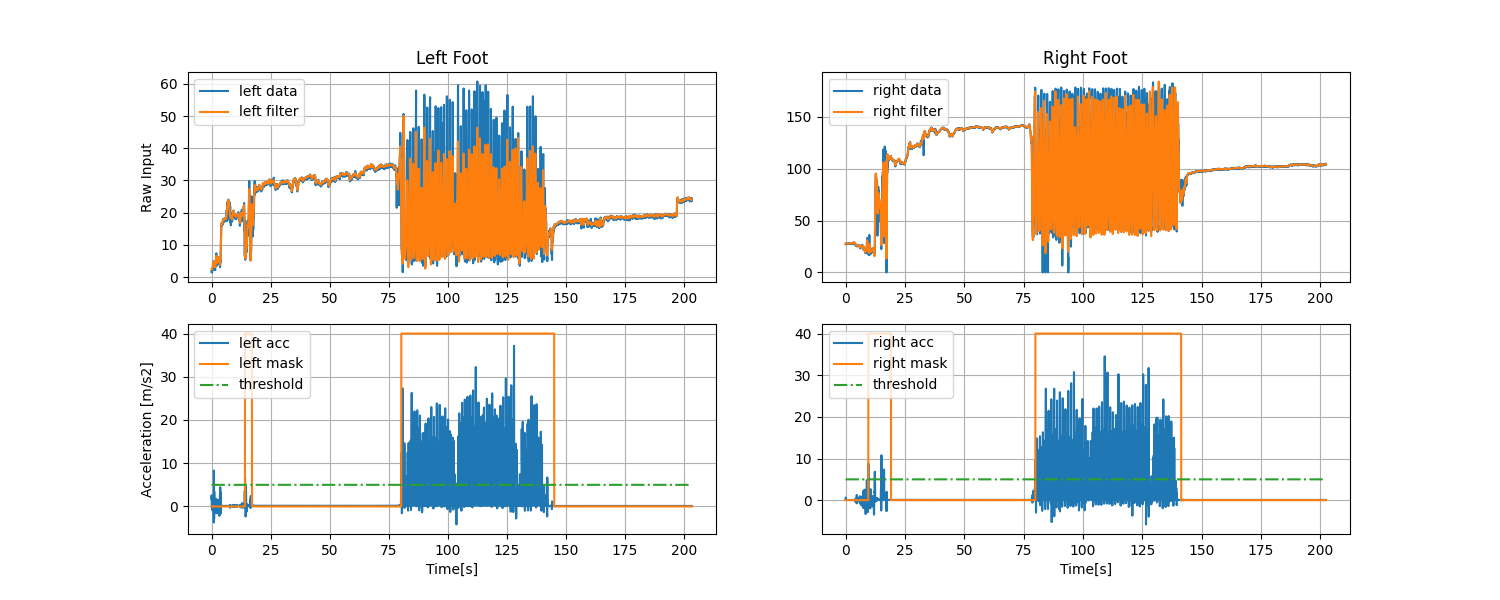

In [ ]:
plt.figure(figsize=(15,6))

# Left Side ---------------------------------------------------------------
side = 'left' 
plt.subplot(2,2,1)
plt.title('Left Foot')
plt.plot(time[side], raw_signal[side], label='left data')
plt.plot(time[side], filt_signal[side], label='left filter')
plt.ylabel('Raw Input')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,3)
plt.plot(time[side], acc[side], label='left acc')
plt.plot(time[side], mask[side] * 40, label='left mask')
plt.plot(time[side], [5 for x in time[side]], '-.', label='threshold')
plt.ylabel('Acceleration [m/s2]')
plt.xlabel('Time[s]')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

# Right Side ---------------------------------------------------------------
side = 'right'
plt.subplot(2,2,2)
plt.title('Right Foot')
plt.plot(time[side], raw_signal[side], label='right data')
plt.plot(time[side], filt_signal[side], label='right filter')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,4)
plt.plot(time[side], acc[side], label='right acc')
plt.plot(time[side], mask[side] * 40, label='right mask')
plt.plot(time[side], [5 for x in time[side]], '-.', label='threshold')
plt.xlabel('Time[s]')    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

# Activity Detection

Picking up from the previous, we can create a mask based on the threshold we set. If the signal passes the threshold we start a counter of the activity. 

If the signal does not pass the threshold again for the duration of 2 seconds, the subject has potentially stopped walking.

# Center of Pressure

We generate two signals representing the center of pressure, one from the raw pressure signal and another from the filtered pressure signal, to draw a comparison between the signals. 


In [ ]:
import utils.cop as Cop

input_left = raw_left[mask['left']].reset_index()
input_right = raw_right[mask['right']].reset_index()

c = cop_main.CenterOfPressure(
    [input_left, input_right]
)

input_left = filter_left[mask['left']].reset_index()
input_right = filter_right[mask['right']].reset_index()
filt_c = cop_main.CenterOfPressure(
    [input_left, input_right]
)

In [ ]:
from scipy.signal import find_peaks

prom = 15
dist = 15

filt_cop={}
cop = {}
peaks = {}

side = 'left'
cop[side] = c.get_cop_foot(side)
filt_cop[side] = filt_c.get_cop_foot(side)
time[side] = [x * 0.05 for x in range(len(cop[side][0]))]


xl = filt_cop[side][1]
peaks[side] = {}
peaks[side]['positive'], _ = find_peaks(xl, prominence=prom, distance=dist)
peaks[side]['negative'], _ = find_peaks(-xl, prominence=prom, distance=dist)


side = 'right'
cop[side] = c.get_cop_foot(side)
filt_cop[side] = filt_c.get_cop_foot(side)
time[side] = [x * 0.05 for x in range(len(cop[side][0]))]

xr = filt_cop[side][1]
peaks[side] = {}
peaks[side]['positive'], _ = find_peaks(xr, prominence=prom, distance=dist)
peaks[side]['negative'], _ = find_peaks(-xr, prominence=prom, distance=dist)

# COP Phases

We use the filtered signal to find the peaks (positive and negative) of the newly obtained cop signal.

When a heel strike is made we consider that the signal is at its lowest point of the insole (the pressure points are at the heel). 

When the toes are lifter the signal should be at the top of the insole (the pressure points are concentrated at the toes).


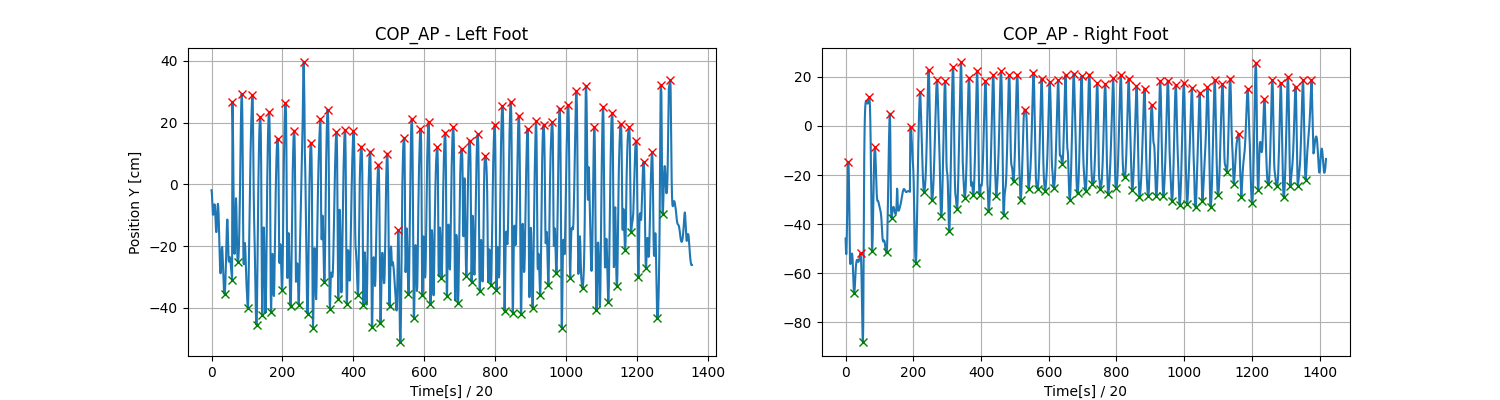

In [ ]:
plt.figure(figsize=(15,4))

side = 'left'
plt.subplot(1,2,1)
plt.title('COP_AP - Left Foot')
plt.plot(xl)
plt.plot(peaks[side]['positive'], xl[peaks[side]['positive']], "x", color='red')
plt.plot(peaks[side]['negative'], xl[peaks[side]['negative']], "x", color='green')
plt.grid(True)
plt.axis('tight')
plt.ylabel('Position Y [cm]')
plt.xlabel('Time[s] / 20')

side = 'right'
plt.subplot(1,2,2)
plt.title('COP_AP - Right Foot')
plt.plot(xr)
plt.plot(peaks[side]['positive'], xr[peaks[side]['positive']], "x", color='red')
plt.plot(peaks[side]['negative'], xr[peaks[side]['negative']], "x", color='green')
plt.grid(True)
plt.axis('tight')
plt.xlabel('Time[s] / 20')

plt.show()


# Calculations

In [ ]:
def closest_peaks(positive, negative): 
    pairs = {
        'step': [],
        'stride': []
    }
    
    timings = {
        'step': [],
        'stride': []
    }
    
    for n in negative:
        for p in positive:
            if n < p:
                distance = abs(p - n)
                pairs['step'].append((p, n))
                timings['step'].append(distance*0.05)
                break
            
    for p in positive:
        for n in negative:
            if n > p:
                distance = abs(n - p)
                pairs['stride'].append((p, n))
                timings['stride'].append(distance*0.05)
                break
            
    return timings, pairs
            

def find_cycle_time(peaks):
    # Calculate distances between pairs of peaks
    time = []
    for i in range(len(peaks) - 1):
        distance = np.abs(peaks[i] - peaks[i + 1])
        time.append(distance*0.05)

    return time

def find_cop_velocity(data, time, peaks):
    velocity_array = []
    
    for i in range(len(time)):
        p, n = peaks[i]
        velocity_array.append((data[p] - data[n]) / time[i])
        
    return velocity_array

        

In [ ]:
side = 'left'
l_timings, l_pairs = closest_peaks(peaks[side]['positive'], peaks[side]['negative'])
l_velocity = find_cop_velocity(xl, l_timings['step'], l_pairs['step'])

side = 'right'
r_timings, r_pairs = closest_peaks(peaks[side]['positive'], peaks[side]['negative'])
r_velocity = find_cop_velocity(xr, r_timings['step'], r_pairs['step'])

print('Calculations: ')
print()
print('-----------------------------------')
print('LEFT')
side = 'left'
print('Average Step Time:', '%.2f' % np.mean(l_timings['step']), '[sec]')
print('Average Stride Time', '%.2f' % np.mean(l_timings['stride']), '[sec]')
print('Average Cycle Time ', '%.2f' % np.mean(find_cycle_time(peaks[side]['negative'])),'[sec]')
print('Average COP Velocity: ', '%.2f' % np.mean(l_velocity), '[mm/s]')
print('COP Variability:', '%.2f' % np.std(filt_cop[side]))
print()
print('-----------------------------------')
print('RIGHT')
side = 'right'
print('Average Step Time:', '%.2f' % np.mean(r_timings['step']), '[sec]')
print('Average Stride Time', '%.2f' % np.mean(r_timings['stride']), '[sec]')
print('Average Cycle Time', '%.2f' % np.mean(find_cycle_time(peaks[side]['negative'])), '[sec]')
print('Average COP Velocity: ', '%.2f' % np.mean(r_velocity), '[mm/s]')
print('COP Variability:', '%.2f' % np.std(filt_cop[side]))


Calculations: 

-----------------------------------
LEFT
Average Step Time: 0.71 [sec]
Average Stride Time 0.49 [sec]
Average Cycle Time  1.19 [sec]
Average COP Velocity:  104.92 [mm/s]
COP Variability: 62.79

-----------------------------------
RIGHT
Average Step Time: 0.70 [sec]
Average Stride Time 0.55 [sec]
Average Cycle Time 1.24 [sec]
Average COP Velocity:  72.45 [mm/s]
COP Variability: 73.03


TypeError: unhashable type: 'dict'

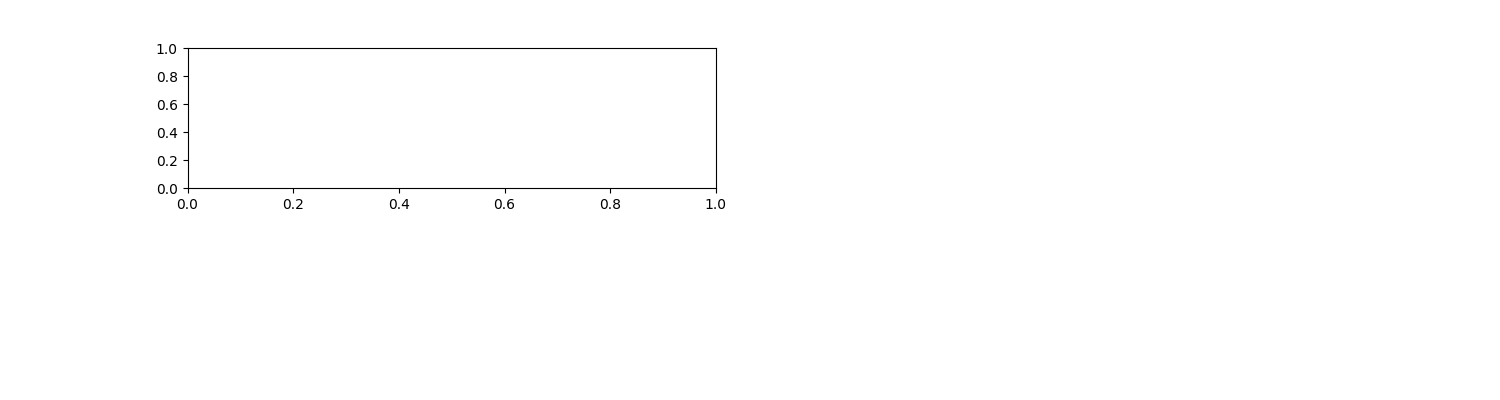

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(2,2,1)
plt.plot(l_closest, label='left cycles')
plt.ylabel('Step Time')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.plot(r_closest, label='right cycles')
plt.xlabel('Step number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,3)
plt.plot(l_velocity, label='left velocity')
plt.ylabel('Velocity')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,4)
plt.plot(r_velocity, label='right velocity')
plt.ylabel('Velocity')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

# Velocity Calculations from Acceleration

In [ ]:
l_acc_masked = left_acc[left_mask].reset_index().iloc[:,1]
r_acc_masked = right_acc[right_mask].reset_index().iloc[:,1]

plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(left_acc[left_mask].reset_index().iloc[:,1], label='left cycles')
plt.plot(l_peaks_positive, l_acc_masked[l_peaks_positive], "x", color='red')
plt.plot(l_peaks_negative, l_acc_masked[l_peaks_negative], "x", color='green')
plt.ylabel('Step Time')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(r_acc_masked, label='right cycles')
plt.plot(r_peaks_positive, r_acc_masked[r_peaks_positive], "x", color='red')
plt.plot(r_peaks_negative, r_acc_masked[r_peaks_negative], "x", color='green')
plt.xlabel('Step number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')


NameError: name 'left_mask' is not defined

In [ ]:
left_acc[left_mask].reset_index().iloc[:,1]


NameError: name 'left_mask' is not defined

# Sensor Details

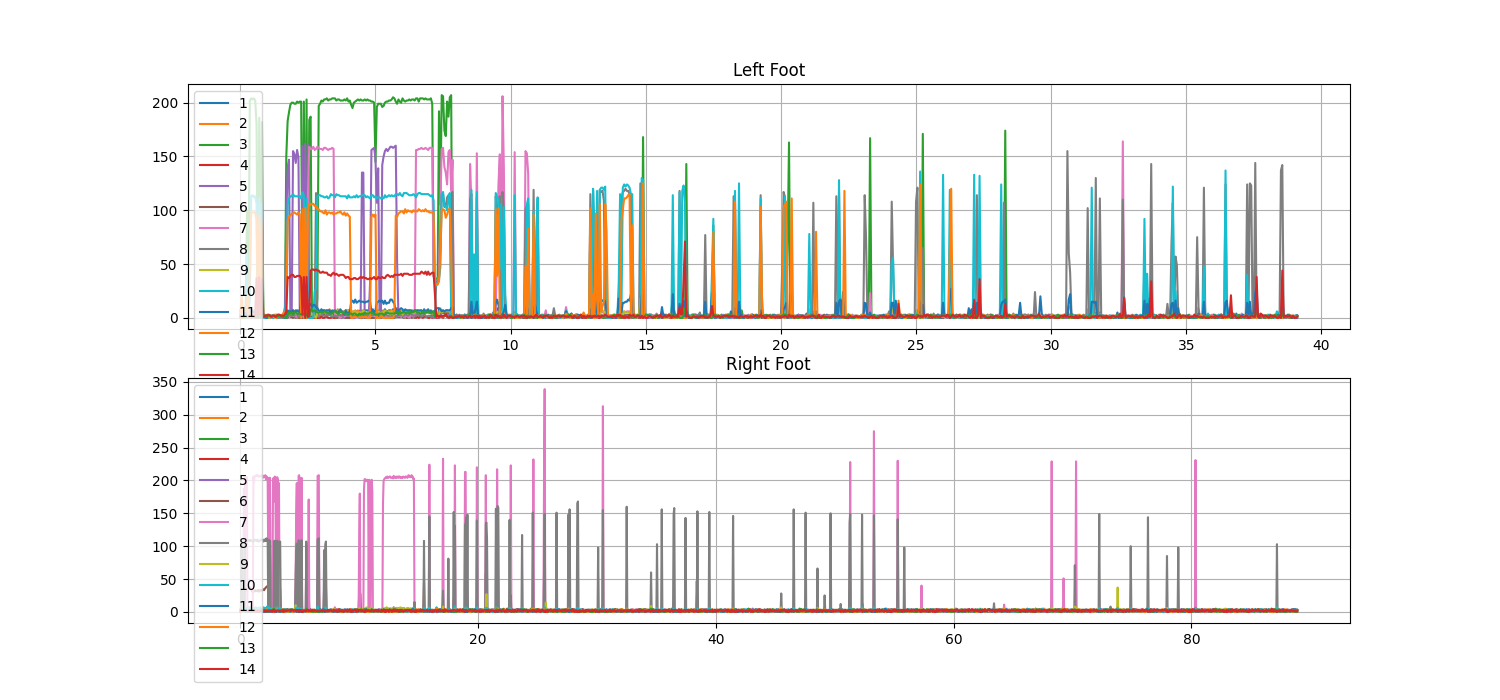

In [ ]:
d = raw_left[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
for col in d.columns:
    plt.plot(time_left, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Left Foot')

d = raw_right[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.subplot(2,1,2)
for col in d.columns:
    plt.plot(time_right, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Right Foot')

plt.show()


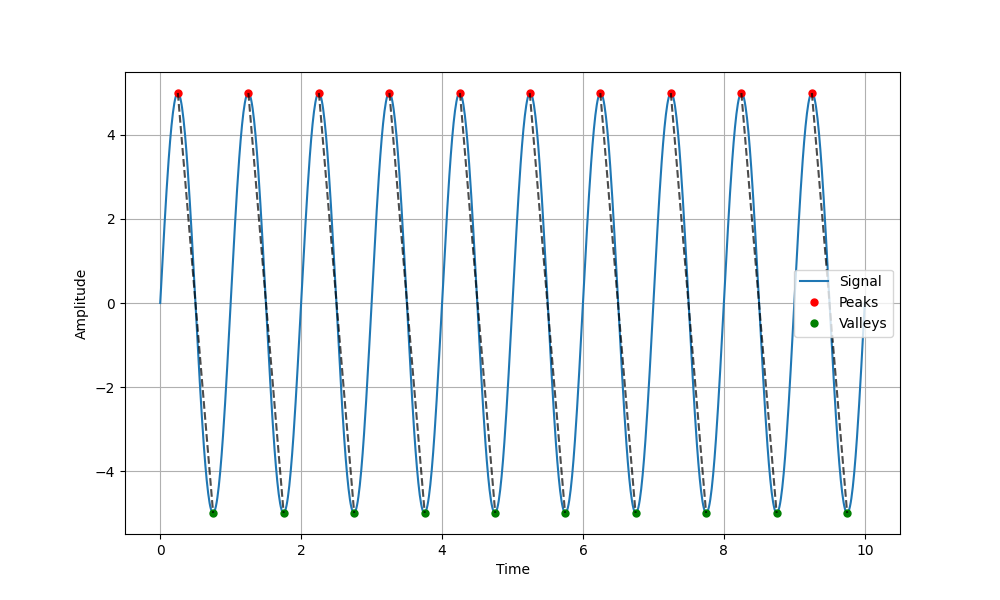

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Sample signal generation (you can replace this with your own signal data)
time = np.linspace(0, 10, 1000)
frequency = 1
amplitude = 5
signal_data = amplitude * np.sin(2 * np.pi * frequency * time)

# Find peaks in the signal
peaks, _ = signal.find_peaks(signal_data)
valleys, _ = signal.find_peaks(-signal_data)

# Check if both minima and maxima peaks exist and form pairs
peak_pairs = []
for peak in peaks:
    # Find the nearest valley to the right of the peak
    nearest_valley = valleys[valleys > peak].min()

    if nearest_valley is not None:
        peak_pairs.append((peak, nearest_valley))

# Plot the signal and detected peaks and valleys
plt.figure(figsize=(10, 6))
plt.plot(time, signal_data, label='Signal')
plt.plot(time[peaks], signal_data[peaks], 'ro', markersize=5, label='Peaks')
plt.plot(time[valleys], signal_data[valleys], 'go', markersize=5, label='Valleys')

# Plot lines connecting peak pairs
for peak, valley in peak_pairs:
    plt.plot([time[peak], time[valley]], [signal_data[peak], signal_data[valley]], 'k--', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()